In [1166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### FOREST FIRES DATASET

- Dataset Link: https://archive.ics.uci.edu/dataset/162/forest+ﬁres

In [1167]:
import warnings
warnings.filterwarnings("ignore")

#### 2.1 Data Preprocessing

Data before Preprocessing:

In [1170]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [1171]:
df.shape

(517, 13)

In [1172]:
# To check whether there exist any missing values?
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There is no null values in the dataset.

In [1174]:
len(df['area'].unique())

251

Encoding categorical variables & Standardizing the Numerical Variables

In [1176]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [1177]:
le_month = LabelEncoder()
le_day = LabelEncoder()

In [1178]:
numerical_cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [1179]:
df['month'] = le_month.fit_transform(df['month'])
df['day'] = le_day.fit_transform(df['day'])

In [1180]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,1.008313,-0.244001,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,1.008313,-0.244001,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,1.440925,1.383722,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,1.440925,1.383722,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


Going to categorize the area column into Small, Medium and Large inorder to proceed further this problem as a Multiclass classification project.
- area: -1 to 0.5 --> small
- area: 0.5 to 1 --> medium
- area: 1 and above --> large

In [1182]:
seperator = [-1,0.5,1,float('Inf')]
labels = ['small','medium','large']
df['area_size'] = pd.cut(df['area'], bins = seperator, labels = labels, right = False)

In [1183]:
df.area_size.value_counts()

area_size
small     489
large      15
medium     13
Name: count, dtype: int64

In [1184]:
X = df.drop('area_size',axis=1)
y = df.area_size

Handling Class Imbalance using SMOTE Approach

In [1186]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)  
X,y= smote.fit_resample(X,y)

In [1187]:
area_size_counts = y.value_counts()
print(area_size_counts)

area_size
small     489
medium    489
large     489
Name: count, dtype: int64


In [1188]:
X.drop('area',axis=1,inplace=True)

Splitting the data into Training and Testing data

In [1190]:
from sklearn.model_selection import train_test_split

In [1191]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

Data after Preprocessing:

In [1193]:
# df.drop('area',axis=1,inplace=True)

In [1194]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_size
0,1.008313,0.569860,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,1.008313,-0.244001,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,1.008313,-0.244001,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,1.440925,1.383722,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,1.440925,1.383722,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


#### 2.2 Exploratory Data Analysis (EDA)

In [1196]:
df_cleaned = df.copy()

In [1197]:
df_cleaned.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_size
0,1.008313,0.569860,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,1.008313,-0.244001,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,1.008313,-0.244001,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,1.440925,1.383722,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,1.440925,1.383722,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


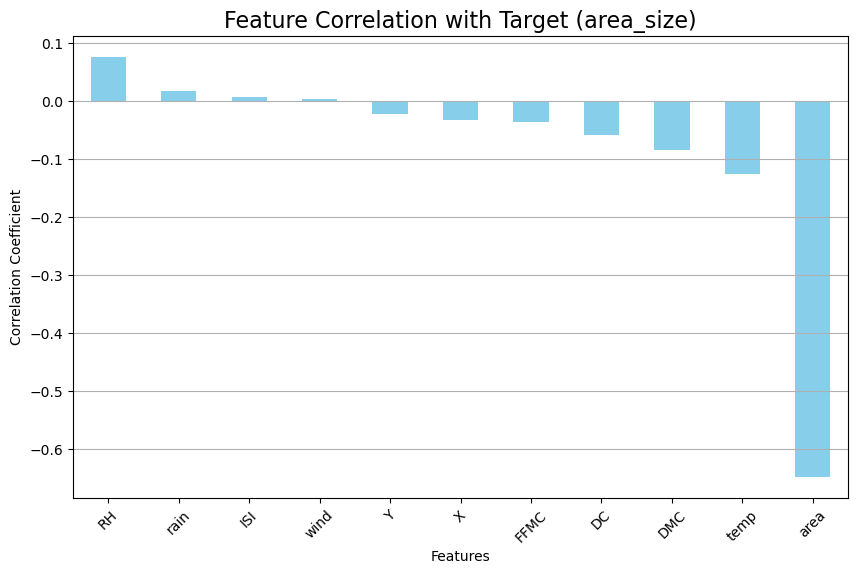

X      -0.032477
Y      -0.021945
FFMC   -0.035872
DMC    -0.085183
DC     -0.058652
ISI     0.007337
temp   -0.125718
RH      0.075571
wind    0.003117
rain    0.016630
area   -0.647912
Name: area_size_encoded, dtype: float64


In [1198]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['area_size_encoded'] = label_encoder.fit_transform(df_cleaned['area_size'])
correlation_with_target = df_cleaned[numerical_cols + ['area_size_encoded']].corr()
target_correlation = correlation_with_target['area_size_encoded'].drop('area_size_encoded')

plt.figure(figsize=(10, 6))
target_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Target (area_size)', fontsize=16)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
print(target_correlation)


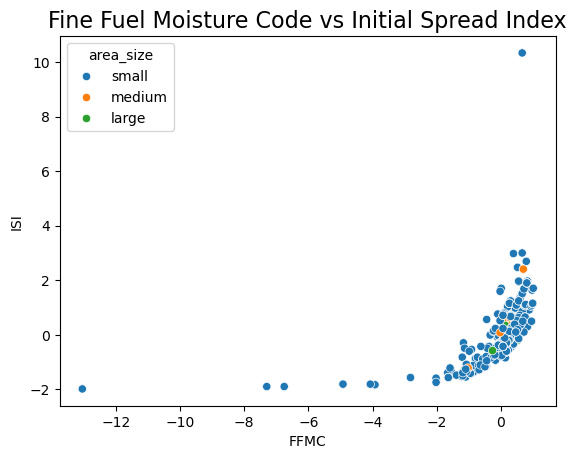

In [1199]:
sns.scatterplot(x='FFMC', y='ISI', hue='area_size', data=df)
plt.title('Fine Fuel Moisture Code vs Initial Spread Index', fontsize=16)
plt.show()

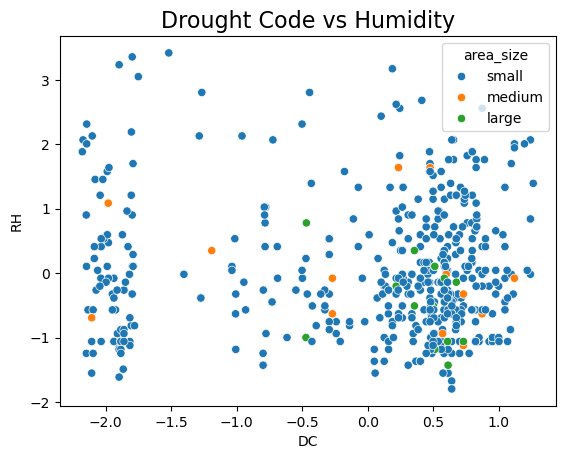

In [1200]:
sns.scatterplot(x='DC', y='RH', hue='area_size', data=df)
plt.title('Drought Code vs Humidity', fontsize=16)
plt.show()

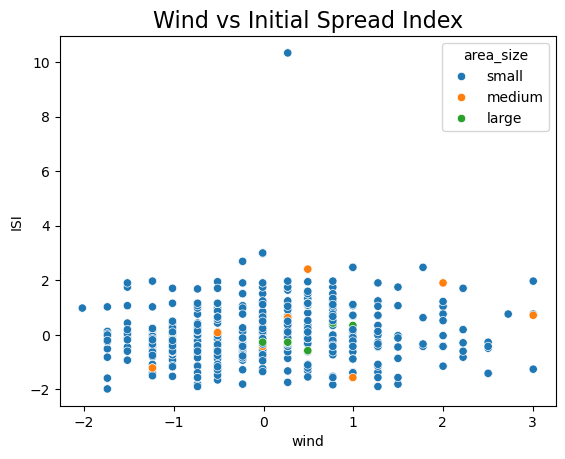

In [1201]:
sns.scatterplot(x='wind', y='ISI', hue='area_size', data=df)
plt.title('Wind vs Initial Spread Index', fontsize=16)
plt.show()

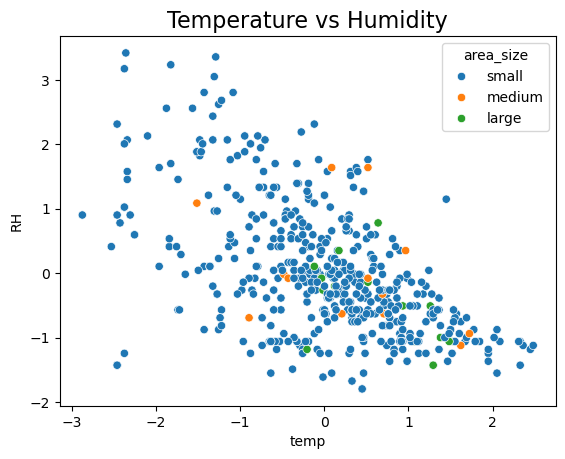

In [1202]:
sns.scatterplot(x='temp', y='RH', hue='area_size', data=df)
plt.title('Temperature vs Humidity', fontsize=16)
plt.show()

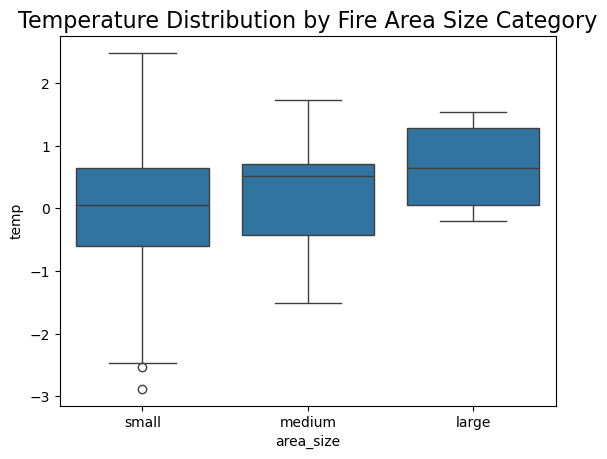

In [1203]:
sns.boxplot(x='area_size', y='temp', data=df)
plt.title('Temperature Distribution by Fire Area Size Category', fontsize=16)
plt.show()

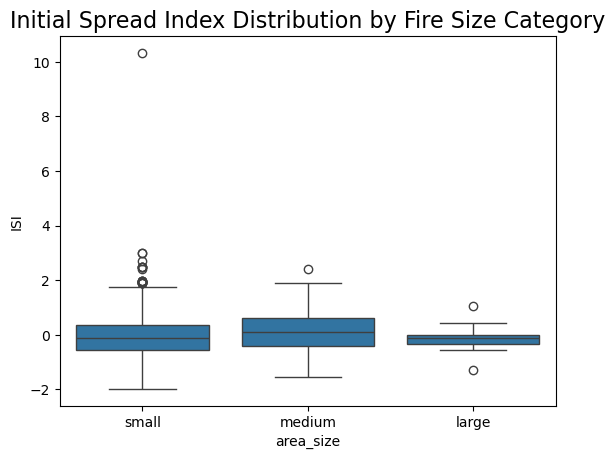

In [1204]:
sns.boxplot(x='area_size', y='ISI', data=df)
plt.title('Initial Spread Index Distribution by Fire Size Category', fontsize=16)
plt.show()

Statistical Distribution of the Data:

In [1206]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,5.170000e+02,5.170000e+02,517.000000,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,2.113074e-16,2.611279e-16,5.758221,2.736944,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969e+00,1.000969e+00,4.373275,1.925061,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.587360e+00,-1.871724e+00,0.000000,0.000000,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-7.221360e-01,-2.440010e-01,1.000000,1.000000,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,-2.895238e-01,-2.440010e-01,6.000000,3.000000,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.008313e+00,5.698604e-01,11.000000,4.000000,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.873537e+00,3.825306e+00,11.000000,6.000000,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [1207]:
numerical_cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

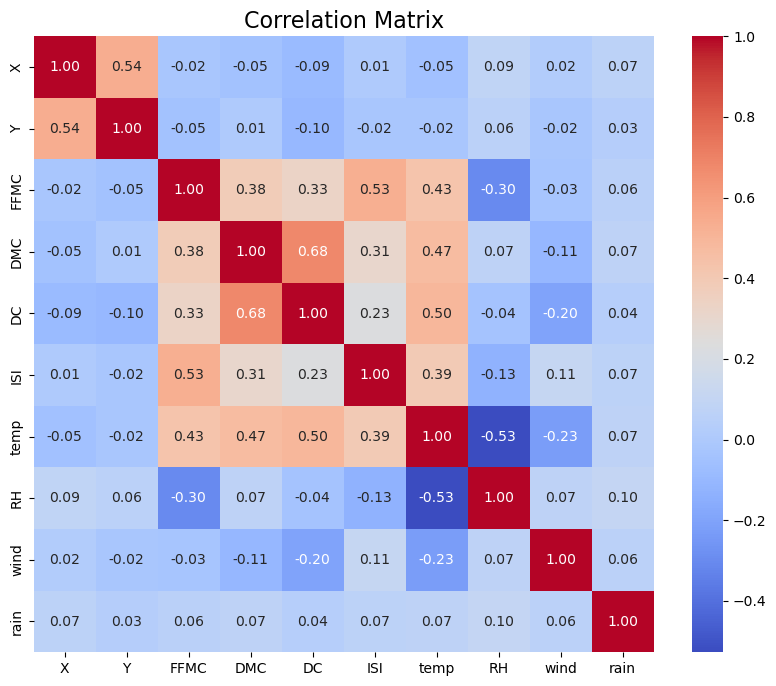

In [1208]:
plt.figure(figsize=(10, 8))
cm = df[numerical_cols].corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

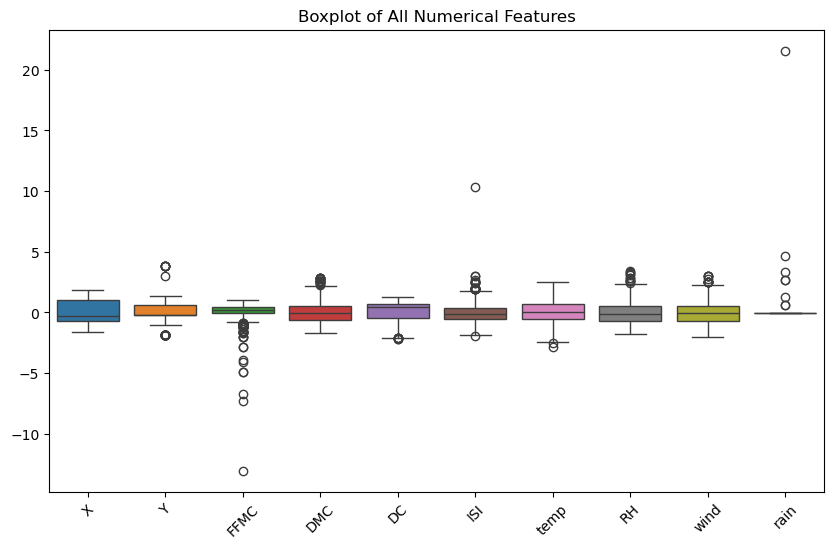

In [1209]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of All Numerical Features')
plt.xticks(rotation=45)
plt.show()


<Figure size 2000x3000 with 0 Axes>

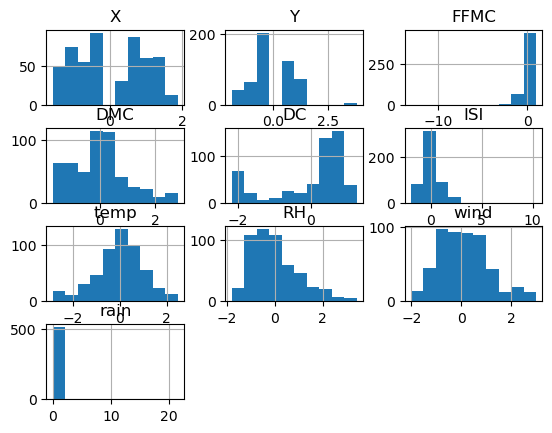

In [1210]:
plt.figure(figsize=(20, 30))
df[numerical_cols].hist(bins=10)
plt.title('Histogram of All Numerical Features')
plt.xticks(rotation=45)
plt.show()

#### 2.3 Model Building and Evaluation:

In [1214]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [1281]:
log_reg = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000)
dtree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=3)
rf_model = RandomForestClassifier(n_estimators=100) 
knn_model = KNeighborsClassifier(n_neighbors=2)

Decision Tree:

In [1283]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)

              precision    recall  f1-score   support

       large       0.88      0.95      0.91        92
      medium       0.90      0.94      0.92       102
       small       0.91      0.80      0.85       100

    accuracy                           0.89       294
   macro avg       0.90      0.90      0.89       294
weighted avg       0.90      0.89      0.89       294



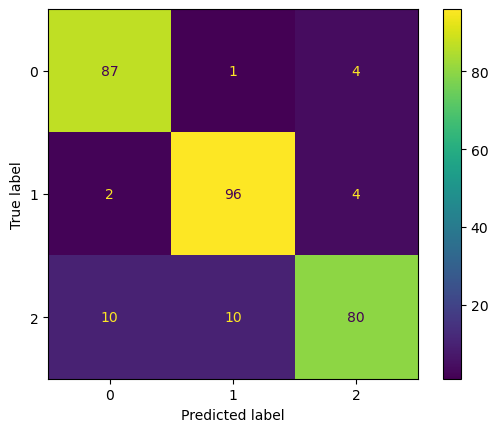

In [1285]:
y_pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,y_pred_dtree))
cm = confusion_matrix(y_test,y_pred_dtree)
a = ConfusionMatrixDisplay(cm)
a.plot()

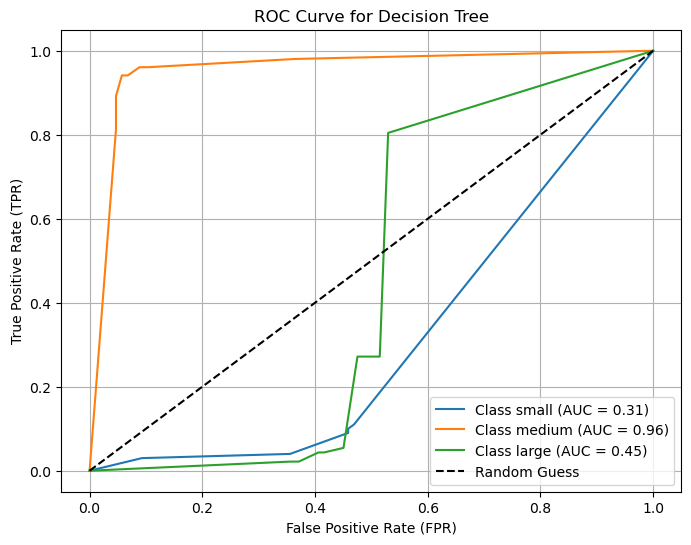

In [1286]:
y_test_binarized = label_binarize(y_test, classes=y.unique())
y_score = dtree.predict_proba(X_test) 

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(y.unique()):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Decision Tree")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


K Nearest Neighbors:

In [1288]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

              precision    recall  f1-score   support

       large       0.82      1.00      0.90        92
      medium       0.89      1.00      0.94       102
       small       1.00      0.67      0.80       100

    accuracy                           0.89       294
   macro avg       0.90      0.89      0.88       294
weighted avg       0.90      0.89      0.88       294



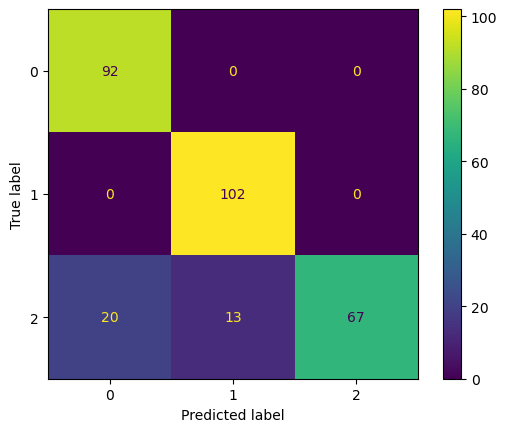

In [1291]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test,y_pred_knn))
cm = confusion_matrix(y_test,y_pred_knn)
a = ConfusionMatrixDisplay(cm)
a.plot()

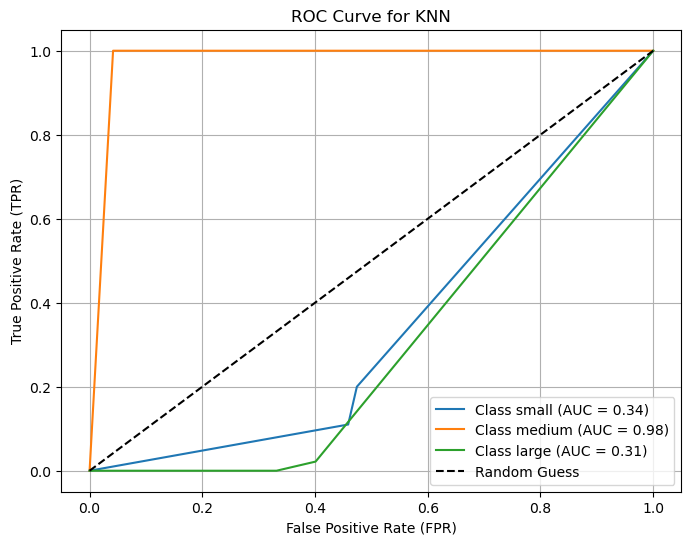

In [1293]:
y_test_binarized = label_binarize(y_test, classes=y.unique())
y_score = knn_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(y.unique()):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for KNN")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Logistic Regression:

In [1294]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

       large       0.56      0.73      0.64        92
      medium       0.63      0.59      0.61       102
       small       0.55      0.44      0.49       100

    accuracy                           0.58       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.58      0.58      0.58       294



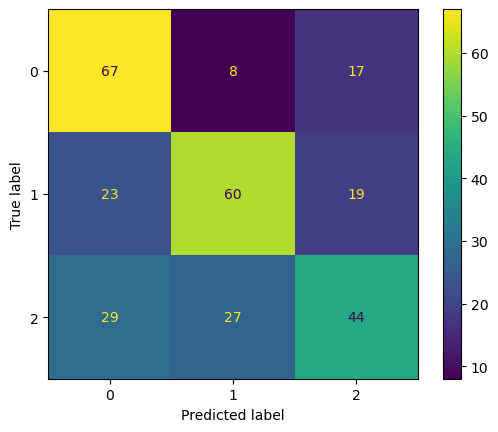

In [1297]:
y_pred_logreg = log_reg.predict(X_test)
print(classification_report(y_test,y_pred_logreg, zero_division=0))
cm = confusion_matrix(y_test,y_pred_logreg)
a = ConfusionMatrixDisplay(cm)
a.plot()

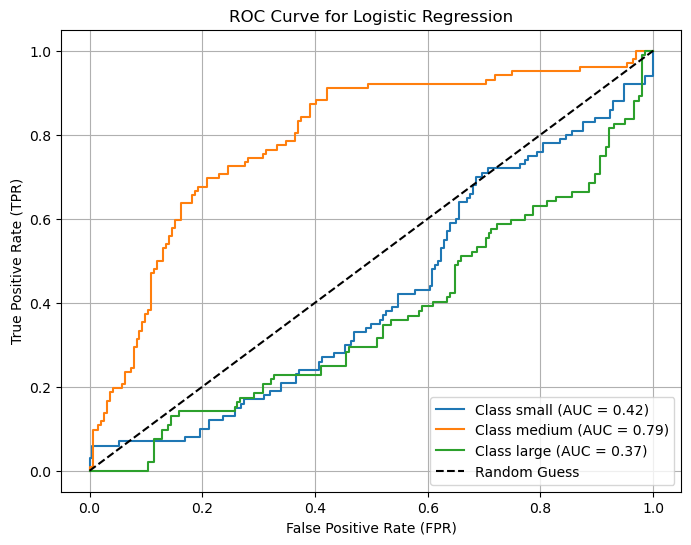

In [1298]:
y_test_binarized = label_binarize(y_test, classes=y.unique())
y_score = log_reg.predict_proba(X_test) 

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(y.unique()):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Random Forest:

In [1301]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

       large       0.98      0.97      0.97        92
      medium       0.98      1.00      0.99       102
       small       0.98      0.97      0.97       100

    accuracy                           0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294



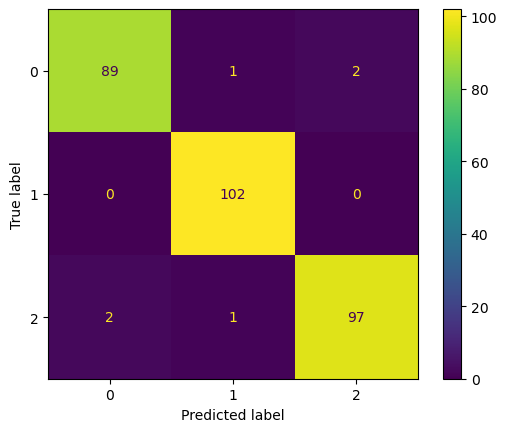

In [1302]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test,y_pred_rf, zero_division=0))
cm = confusion_matrix(y_test,y_pred_rf)
a = ConfusionMatrixDisplay(cm)
a.plot()

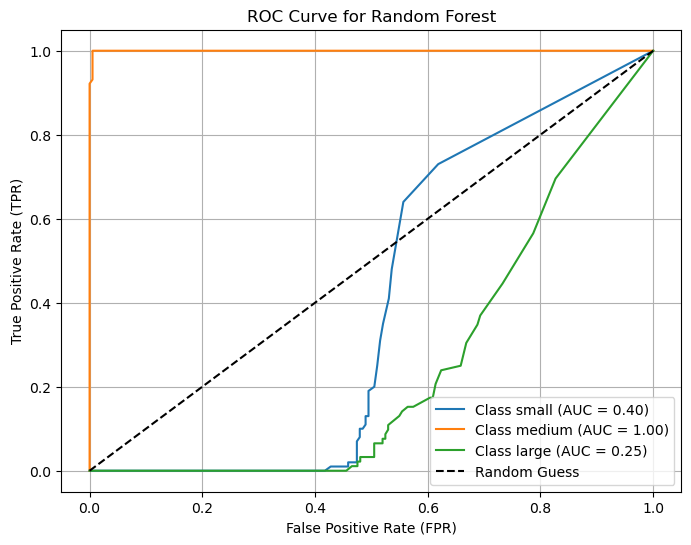

In [1305]:
y_test_binarized = label_binarize(y_test, classes=y.unique())
y_score = rf_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(y.unique()):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Random Forest")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

- Based on the comparison of all the models, Random Forest performs better with an overall accuracy of 98%.
- It shows a better precision and recall for the area_size: small which is the most probable class of the dataset.
- It outperformed other models such as 'Logistic Regression' and 'KNN'.
- It's class performance, a strong performance in the case of the 'small' class and poor recall in the case of 'large and medium' classes.

#### 2.4 Interpretation of Results and Conclusion 

- The features which are more important for this classification task is 'ISI(Initial Spread Index)' and 'RH(Humidity)' because of the high correlation value ie. greater than 0 (Usually the correlation value lies between -1(Negative Correlation) to +1(Positive Correalation)).
- Here by using the model we can accurately detect the areas which will have a widespread fire catching possibility, we will use this Machine Learning model to accurately detect the areas which will have a high possibility of firedetection with a huge area prone to affect by fire.
- The real world application is we can detect the forest fires, we can be aware of the regions which should have precautionary measures ready like with 'fire engines' and we can prevent the vegetation of the forest like trees and animals living in these forests.